<a href="https://colab.research.google.com/github/Rogerio-mack/IA_2022S2/blob/main/Aula7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Dados

In [124]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [125]:
df.shape

(344, 7)

In [126]:
df.isnull().sum() 

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [127]:
df = df.dropna().reset_index(drop=True)
print(df.isnull().sum())
df.head()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [128]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

# Linear Regression


Score:

0.76


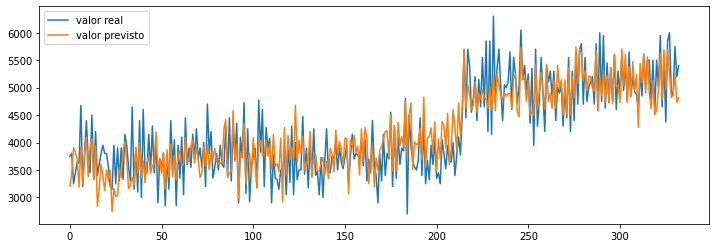

In [129]:
from sklearn import linear_model
# Entradas e Saídas
X = df[[ 'bill_length_mm', 'bill_depth_mm','flipper_length_mm']]
y = df['body_mass_g']

# Definição
reg = linear_model.LinearRegression()

# Treinamento
reg.fit(X,y)

# Avaliação
y_pred = reg.predict(X)

score = reg.score(X, y)
print('\nScore:\n')
print(f'{score:.2f}')

fig = plt.figure(figsize=(12,4))

plt.plot(df['body_mass_g'],label='valor real')
plt.plot(y_pred,label='valor previsto')

plt.legend()
plt.show()



# Adicionando um atributo categórico: hot encode

In [130]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [131]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

hot_encode = OneHotEncoder(handle_unknown='ignore') 
hot_encode = hot_encode.fit(df[['species']])
transformed = hot_encode.transform(df[['species']]).toarray()

transformed_df = pd.DataFrame(transformed, columns=hot_encode.get_feature_names_out())
display(transformed_df.head())

df = pd.concat([df, transformed_df],axis=1) 
df.head()


,species_Adelie,species_Chinstrap,species_Gentoo
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,0.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,0.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,0.0,0.0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,0.0,0.0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1.0,0.0,0.0


In [132]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'species_Adelie',
       'species_Chinstrap', 'species_Gentoo'],
      dtype='object')


Score:

0.85


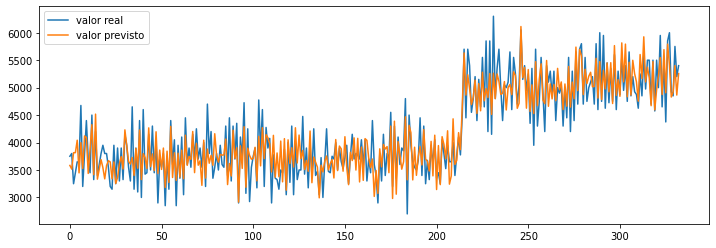

In [133]:
from sklearn import linear_model
# Entradas e Saídas
X = df[[ 'bill_length_mm', 'bill_depth_mm','flipper_length_mm','species_Adelie',
       'species_Chinstrap', 'species_Gentoo']]
y = df['body_mass_g']

# Definição
reg = linear_model.LinearRegression()

# Treinamento
reg.fit(X,y)

# Avaliação
y_pred = reg.predict(X)

score = reg.score(X, y)
print('\nScore:\n')
print(f'{score:.2f}')

fig = plt.figure(figsize=(12,4))

plt.plot(df['body_mass_g'],label='valor real')
plt.plot(y_pred,label='valor previsto')

plt.legend()
plt.show()



# Classificação



In [134]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'species_Adelie',
       'species_Chinstrap', 'species_Gentoo'],
      dtype='object')

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC

# Entradas e Saídas
X = df[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']]
y = df['island']

# Definição
# clf = LogisticRegression(max_iter=1000)
# clf = KNeighborsClassifier(5)
# clf = SVC()
clf = DecisionTreeClassifier(random_state=1) 

# Treinamento
clf.fit(X,y)

# Avaliação
y_pred = clf.predict(X)

print('Acuracidade = ', sum( y == y_pred) / len(y))






Acuracidade =  1.0


# All reports

In [137]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)
    
accuracy = accuracy_score(y_test, y_pred)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.2f}')

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Matriz de Confusão:

[[42  6  1]
 [ 7 27  3]
 [ 9  4  1]]

Score de Acuracidade (1):

0.70

Score de Acuracidade (2):

0.70

Classification Report:

              precision    recall  f1-score   support

      Biscoe       0.72      0.86      0.79        49
       Dream       0.73      0.73      0.73        37
   Torgersen       0.20      0.07      0.11        14

    accuracy                           0.70       100
   macro avg       0.55      0.55      0.54       100
weighted avg       0.65      0.70      0.67       100



# Separando conjuntos de Treinamento e Teste

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

# Entradas e Saídas
X = df[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']]
y = df['island']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

# Definição
# clf = LogisticRegression(max_iter=1000)
# clf = KNeighborsClassifier(5)
# clf = SVC()
clf = DecisionTreeClassifier(random_state=1) 

# Treinamento
clf.fit(X_train,y_train)

# Avaliação
y_pred = clf.predict(X_test)

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))






Classification Report:

              precision    recall  f1-score   support

      Biscoe       0.72      0.86      0.79        49
       Dream       0.73      0.73      0.73        37
   Torgersen       0.20      0.07      0.11        14

    accuracy                           0.70       100
   macro avg       0.55      0.55      0.54       100
weighted avg       0.65      0.70      0.67       100



# Adicionando um atributo categórico: hot encode

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

# Entradas e Saídas
X = df[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'species_Adelie',
       'species_Chinstrap', 'species_Gentoo']]
y = df['island']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

# Definição
# clf = LogisticRegression(max_iter=1000)
# clf = KNeighborsClassifier(5)
# clf = SVC()
clf = DecisionTreeClassifier(random_state=1)  

# Treinamento
clf.fit(X_train,y_train)

# Avaliação
y_pred = clf.predict(X_test)

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))






Classification Report:

              precision    recall  f1-score   support

      Biscoe       0.76      0.86      0.81        49
       Dream       0.75      0.73      0.74        37
   Torgersen       0.11      0.07      0.09        14

    accuracy                           0.70       100
   macro avg       0.54      0.55      0.54       100
weighted avg       0.67      0.70      0.68       100



# Adicionando um atributo categórico: label encode

In [140]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

LabelEncode = LabelEncoder()
LabelEncode = LabelEncode.fit(df['sex'])
labels = LabelEncode.transform(df['sex'])

df_labels = pd.DataFrame(labels, columns=['sex_label'])

df = pd.concat([df, df_labels], axis=1)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,sex_label
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,0.0,0.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,0.0,0.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,0.0,0.0,0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,0.0,0.0,0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1.0,0.0,0.0,1


# Normalizando os dados

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# Entradas e Saídas
X = df[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'species_Adelie',
       'species_Chinstrap', 'species_Gentoo', 'sex_label']]
y = df['island']

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)
# Definição
# clf = LogisticRegression(max_iter=1000)
# clf = KNeighborsClassifier(5)
# clf = SVC()
clf = DecisionTreeClassifier(random_state=1) 

# Treinamento
clf.fit(X_train,y_train)

# Avaliação
y_pred = clf.predict(X_test)

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))








Classification Report:

              precision    recall  f1-score   support

      Biscoe       0.76      0.84      0.80        49
       Dream       0.74      0.76      0.75        37
   Torgersen       0.12      0.07      0.09        14

    accuracy                           0.70       100
   macro avg       0.54      0.55      0.54       100
weighted avg       0.66      0.70      0.68       100

